In [1]:
import pandas as pd
import numpy as np

In [2]:
ca_df = pd.read_excel('California_housing.xlsx')

In [3]:
ca_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
ca_df.shape

(20640, 10)

In [5]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
ca_df.isnull().sum()
# Missing records exist for total_bedrooms

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
ca_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Encoding categorical data to numerical data

In [8]:
ca_encd = pd.get_dummies(ca_df,columns=['ocean_proximity'])
ca_encd.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0,0,0,1,0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0,0,0,1,0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,0,0,0,1,0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,0,0,0,1,0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,0,0,0,1,0


In [9]:
ca_df = ca_encd
ca_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [10]:
ca_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing value treatment

<AxesSubplot:>

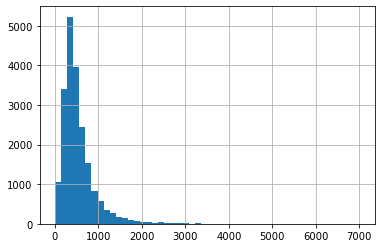

In [11]:
ca_df['total_bedrooms'].hist(bins=50,range=(0,7000))

In [17]:
# Filling the missing values with the mean
ca_df['total_bedrooms'] = np.where(ca_df['total_bedrooms'].isnull(),ca_df['total_bedrooms'].mean(),ca_df['total_bedrooms'])

In [19]:
ca_df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [20]:
# Extracting (X) and (Y) from the dataset
y = ca_df['median_house_value']
x = ca_df.drop('median_house_value',axis=1)

In [21]:
print(y)
x.head()

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


## Splitting data into train and test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)

In [25]:
print("x train and test :\n",xtrain.shape,'\n',xtest.shape,"\ny train and test :\n",ytrain.shape,'\n',ytest.shape)

x train and test :
 (16512, 13) 
 (4128, 13) 
y train and test :
 (16512,) 
 (4128,)


## Standardizing dependent variables
to make their weightage/units same

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)  
# Only transforming on the basis of fit() done in train data so that we have same mean and stdev throughout

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=True,copy_X=True)

In [30]:
lin_model.fit(xtrain_sc,ytrain)

LinearRegression()

In [31]:
# Coefficients
lin_model.coef_

array([-54476.10287485, -55321.43074371,  13469.23029665, -10818.28237954,
        31309.17719571, -41542.83609617,  26178.27524951,  73610.06677446,
         5978.05735475, -12364.82826787,   2927.29149078,   2669.92386004,
         5685.20676993])

In [32]:
# Prediction 
ypred = lin_model.predict(xtest_sc)

In [33]:
ypred

array([276313.4461001 , 281737.57791607, 274318.57208302, ...,
       229658.05582562, 117362.84467916, 378223.86712439])

## RMSE

In [35]:
err = ytest - ypred

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,ypred)
import math
math.sqrt(mse)

69457.92755247482